# Final Model

After extensive grid searching, a final model which produced an AUC score of 0.9814 was selected.  This model was used in the web app and web camera portions.

## Python Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import cv2
import os
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical

# Imports for usint %%timeit cell magic
import time
from PIL import Image, ImageDraw

In [2]:
# # If using Google Colab, be sure to mount your drive
# from google.colab import drive
# drive.mount('/content/drive/', force_remount=True)

In [3]:
# os.getcwd()

## Import images

This portion of code will read in and unzip the image training data and resize it to work with modeling step.

In [4]:
# # Unzip files saved on Google Colab
# !unzip '/content/drive/MyDrive/DSIR 2-8 Group Project/Data/training_zipped/scrubbed_training_data/new_closed_eyes.zip'
# !unzip '/content/drive/MyDrive/DSIR 2-8 Group Project/Data/training_zipped/scrubbed_training_data/new_open_eyes.zip'

In [5]:
# Converting all the images into an array
def load_images_from_folder(folder, eyes = 0):
    count = 0
    error_count = 0
    images = []
    for filename in os.listdir(folder):
        try:
            img = cv2.imread(os.path.join(folder,filename))
            img = cv2.resize(img, (80,80)) ## Resizing the images
            ## for eyes if it is 0: open, 1: close
            images.append([img, eyes])
        # need a try or except or else it will give an error when resizing the images
        except:
            error_count += 1
            print('ErrorCount = ' + str(error_count))
            continue
        count += 1
        if count % 500 == 0:
            print('Succesful Image Import Count = ' + str(count))

    return images

# Pulling open eye images from directory and passing through image loading function

folder="../data/train/new_open_eyes"
# folder="/content/new_open_eyes"
open_eye = load_images_from_folder(folder, 0)

# Pulling closed eye images from directory and passing through image loading function
folder="../data/train/New_Closed_Eyes"
# folder="/content/New_Closed_Eyes"
close_eye = load_images_from_folder(folder, 1)

Succesful Image Import Count = 500
Succesful Image Import Count = 1000
Succesful Image Import Count = 1500
Succesful Image Import Count = 2000
Succesful Image Import Count = 2500
Succesful Image Import Count = 3000
Succesful Image Import Count = 3500
Succesful Image Import Count = 4000
Succesful Image Import Count = 4500
Succesful Image Import Count = 5000
Succesful Image Import Count = 5500
Succesful Image Import Count = 6000
Succesful Image Import Count = 6500
Succesful Image Import Count = 7000
Succesful Image Import Count = 7500
Succesful Image Import Count = 8000
Succesful Image Import Count = 8500
Succesful Image Import Count = 9000
Succesful Image Import Count = 9500
Succesful Image Import Count = 10000
Succesful Image Import Count = 10500
Succesful Image Import Count = 11000
Succesful Image Import Count = 11500
Succesful Image Import Count = 12000
Succesful Image Import Count = 12500
Succesful Image Import Count = 13000
Succesful Image Import Count = 13500
Succesful Image Impor

In [6]:
len(open_eye)

26163

In [7]:
# combining the open and closed eye data 
eye = close_eye + open_eye

## Convert an array to a image

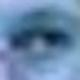

In [8]:
from PIL import Image as im
data = im.fromarray(open_eye[0][0])
data

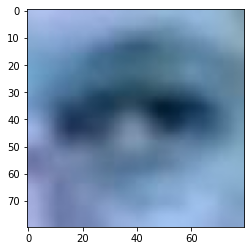

In [9]:
plt.imshow(open_eye[0][0]);

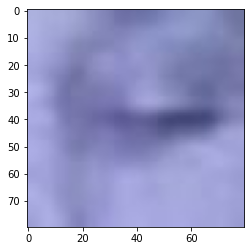

In [10]:
# picture in a grid
# checking if the images are in the same size
plt.imshow(eye[2999][0]);

In [11]:
X = []
y = []

for features, label in eye:
    X.append(features)
    y.append(label)

In [12]:
# Data must be in array form for modeling
X = np.array(X).reshape(-1, 80, 80, 3)
y = np.array(y)

In [13]:
X = X/255.0

In [14]:
# Setting up Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 24)

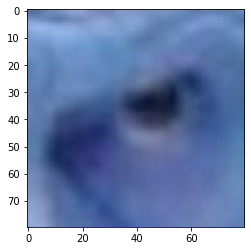

In [15]:
plt.figure()
plt.imshow(X_train[10])
plt.show()

In [16]:
## for the images below
class_names = ['open', 'close']

## Ten pictures of Training set

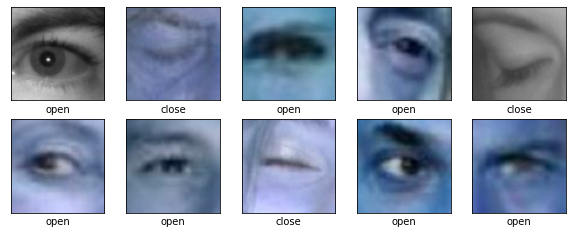

In [17]:
# Code to produce ten pictures from the training dataset with corresponding lable
plt.figure(figsize = (10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[y_train[i]],)

In [18]:
# Reshape each image to be 80x80x3 just in case on the top it didn't resize the image.
X_train = X_train.reshape(X_train.shape[0], 80, 80, 3)
X_test = X_test.reshape(X_test.shape[0], 80, 80, 3)

## Final Model for Export

**AUC score of best model produced by Grid Search:** 0.9814751568885037

**Parameters of best model produced by Grid Search:**
*  dense_neurons_1: 256
*  dense_neurons_2: 512
*  dense_neurons_3': 1028
*  dropout: 0.4
*  epochs: 30
*  filters: 3 
*  layout: '2*3x3',
*  pooling: 1


In [19]:
# Instantiate the model
model = Sequential()

# Adding first conv 2d layer
model.add(Conv2D(
                filters = 32, # number of filters
                kernel_size = (3,3), # height/width of filter
                activation = 'relu', # activation function 
                input_shape = (80,80,3) # shape of input (image)
))

# Adding pooling after conv 2d layer
model.add(MaxPooling2D(pool_size = (2,2))) # Dimensions of the region that you are pooling

# Add another convolutional layer.
model.add(Conv2D(
                filters = 32, # number of filters
                kernel_size = (3,3),# height/width of filter
                activation = 'relu'# activation function 
))

# Add another pooling layer.
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Adding first dense layer with 256 nodes
model.add(Dense(256, activation='relu'))

# Adding a dropout layer to avoid overfitting
model.add(Dropout(0.4))

# Adding a dense layer
model.add(Dense(512, activation='relu'))

# Adding a dropout layer to avoid overfitting
model.add(Dropout(0.4)) 

model.add(Dense(1024, activation='relu'))

# Adding a dropout layer to avoid overfitting
model.add(Dropout(0.4))


model.add(Dense(1, activation = 'sigmoid'))
  
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=[tf.keras.metrics.AUC(curve = 'PR')])

model.fit(X_train,
            y_train,
            batch_size=800,
            # # Comment out validation_data line to export the model
            # validation_data=(X_test, y_test),
            epochs=32)

Epoch 1/32
29/29 [==============================] - 118s 4s/step - loss: 0.3883 - auc: 0.2854
Epoch 2/32
29/29 [==============================] - 102s 4s/step - loss: 0.2352 - auc: 0.6891
Epoch 3/32
29/29 [==============================] - 88s 3s/step - loss: 0.1070 - auc: 0.9157
Epoch 4/32
29/29 [==============================] - 87s 3s/step - loss: 0.0685 - auc: 0.9637
Epoch 5/32
29/29 [==============================] - 103s 4s/step - loss: 0.0559 - auc: 0.9745
Epoch 6/32
29/29 [==============================] - 102s 3s/step - loss: 0.0491 - auc: 0.9799
Epoch 7/32
29/29 [==============================] - 97s 3s/step - loss: 0.0429 - auc: 0.9843
Epoch 8/32
29/29 [==============================] - 106s 4s/step - loss: 0.0425 - auc: 0.9850
Epoch 9/32
29/29 [==============================] - 100s 3s/step - loss: 0.0391 - auc: 0.9875
Epoch 10/32
29/29 [==============================] - 94s 3s/step - loss: 0.0358 - auc: 0.9886
Epoch 11/32
29/29 [==============================] - 97s 3s/ste

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10368)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               2654464   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [21]:
# Evaluate model on test data.
score = model.evaluate(X_test,
                       y_test,
                       verbose=1)

labels = model.metrics_names

# Show model performance.
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

235/235 [==============================] - 9s 37ms/step - loss: 0.0427 - auc: 0.9817
loss: 0.04273489490151405
auc: 0.9817453622817993


In [22]:
preds = model.predict(X_test)
preds.round(1)
preds

array([[2.6884675e-04],
       [8.1007731e-14],
       [4.7075515e-05],
       ...,
       [3.7239593e-14],
       [1.1180638e-16],
       [4.0030482e-06]], dtype=float32)

In [23]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=preds.round()).numpy()

confusion_matrix

array([[6502,   39],
       [  31,  947]], dtype=int32)

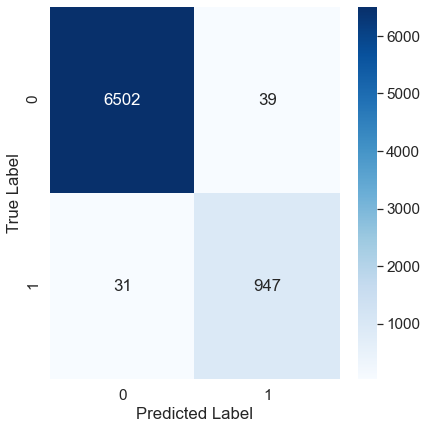

In [39]:
import seaborn as sns

figure = plt.figure(figsize=(6,6))

sns.set(font_scale=1.4)

sns.heatmap(confusion_matrix, annot=True, cmap=plt.cm.Blues, fmt='g')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [40]:
tn, fp, fn, tp = confusion_matrix.ravel()

In [41]:
# Calculate the specificity
specificty = tn / (tn + fp)
print(f'specificity: {specificty}')

# Sensitivity
sensitivity = tp / (tp + fn)
print(f'sensitivity / recall: {sensitivity}')

# Accuracy
accuracy = (tn + tp) / (tn + fp + fn + tp)
print(f'accuracy: {accuracy}')

# Precision
precision = tp / (tp + fp)
print(f'precision: {precision}')

specificity: 0.9940376089282984
sensitivity / recall: 0.9683026584867076
accuracy: 0.9906902513632132
precision: 0.960446247464503


## Comparison of Best Model

After running a handful of models for timing purposes, below are the specificity, recall, accuracy, and precision scores of each.

**best_model_2.h5**
*  The best model produced by the Grid Search with nothing removed.
*  specificity: 0.9955664271518117
*  sensitivity: 0.9447852760736196
*  accuracy: 0.9889612980449528
*  precision: 0.9695697796432319

**best_model_3.h5**
*  This model removed one conv2d layer and one maxpooling2d layer from the final model above.
*  specificity: 0.9926616725271366
*  sensitivity / recall: 0.9202453987730062
*  accuracy: 0.9832424524537837
*  precision: 0.9493670886075949

**best_model_4.h5**
*  This model removed one dense layer one dropout layer from the final model above.
*  specificity: 0.9923559088824339
*  sensitivity / recall: 0.9488752556237219
*  accuracy: 0.9867003590903045
*  precision: 0.9488752556237219




In [ ]:
# Exporting the best model
# Be sure to comment out "validation_data=(X_test, y_test)" line for export

# # Google Colab export
# model.save('/content/drive/MyDrive/Python/best_model_2.h5')

# Local machine export
model.save('./output/best_model_x.h5')

## Using the %%timeit Cell Magic to find Processing Speed

Testing a single image through the best model in order to see speed

In [19]:
import numpy as np
import time
from PIL import Image, ImageDraw
import tensorflow as tf

In [20]:
%%timeit

cropped_eye = Image.open('../data/train/New_Closed_Eyes/eye_crop_closed0.jpg')

# update name of model you will be saving
saved_model = tf.keras.models.load_model('./output/best_model_2.h5')

def run_saved_model(model, eye_img):
    arr = np.asarray(eye_img)
    arr = arr.reshape(1, 80, 80, 3)
    prediction = model.predict(arr)[0][0].round()
    return prediction

prediction = run_saved_model(saved_model, cropped_eye)

print(prediction)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
292 ms ± 26.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**best_model_2.h5:**  
*   The best model produced by the Grid Search with nothing removed. 
*   Using the GPU accelerator in Google Colab: The slowest run took 15.78 times longer than the fastest. 1 loop, best of 5: 266 ms per loop
*   Using the TPU accelerator in Google Colab: The slowest run took 4.42 times longer than the fastest. 
1 loop, best of 5: 360 ms per loop

**best_model_3.h5:** 
*   This model removed one conv2d layer and one maxpooling2d layer from the final model above.
*   Using the GPU accelerator in Google Colab: The slowest run took 7.19 times longer than the fastest. 1 loop, best of 5: 435 ms per loop
*   Using the TPU accelerator in Google Colab: The slowest run took 6.69 times longer than the fastest. 1 loop, best of 5: 650 ms per loop

**best_model_4.h5:**  
*   This model removed one dense layer one dropout layer from the final model above.
*   Using the GPU accelerator in Google Colab: The slowest run took 9.69 times longer than the fastest. 1 loop, best of 5: 244 ms per loop
*   Using the TPU accelerator in Google Colab: The slowest run took 8.45 times longer than the fastest.  1 loop, best of 5: 370 ms per loop 